In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path
ROOT_DIR = os.path.abspath(os.path.join(Path().absolute(), os.pardir))
sys.path.insert(1, ROOT_DIR)

In [4]:
from time import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
from frequency_response import FrequencyResponse

In [5]:
def fft_time(x):
    start = time()
    X = scipy.fftpack.fft(x)
    #X = np.fft.fft(x)
    return time() - start

In [13]:
start = 2
end = 10000
y = np.random.random(end-start)
n = np.arange(start, end)
fast_n = [2]
while fast_n[-1] < end:
    fast_n.append(scipy.fftpack.next_fast_len(fast_n[-1]+1))
fast_n = np.array(fast_n)

t = []
fast_t = []
for i in n:
    d = fft_time(y[:i])
    t.append(d)
    if i in fast_n:
        fast_t.append(d)
t = np.array(t)
fast_t = np.array(fast_t)
fast_n = fast_n[:-1]

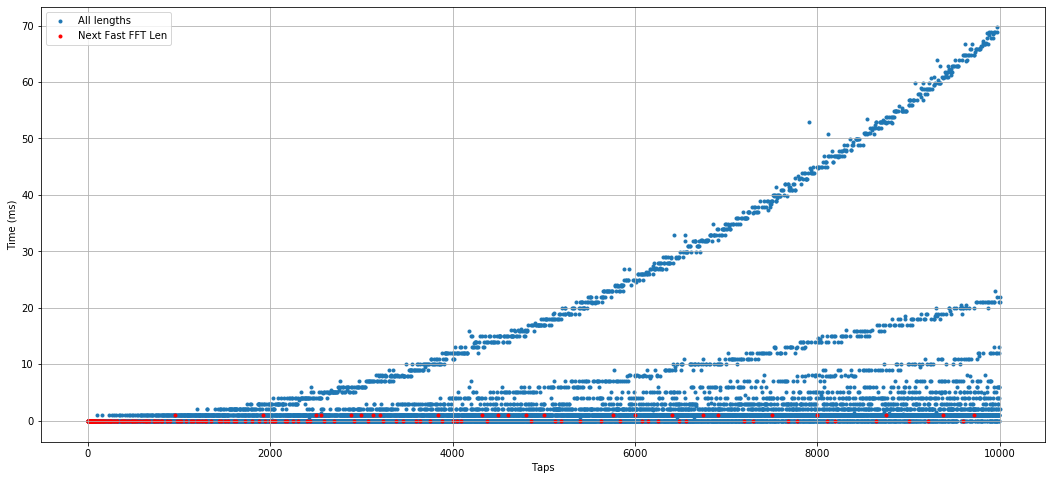

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
ax.scatter(n, t*1000, marker='.', label='All lengths')
ax.scatter(fast_n, fast_t*1000, marker='.', color='red', label='Next Fast FFT Len')
ax.grid(True)
ax.set_xlabel('Taps')
ax.set_ylabel('Time (ms)')
ax.legend()
plt.show()